In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "C:\\Users\\sures\\OneDrive\\Documents\\Data Science\\Data Sets\\heart.csv"
heart_df = pd.read_csv(file_path)
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


- This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

In [4]:
heart_df.shape

(1025, 14)

In [5]:
heart_df.size

14350

In [6]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Before you develop any ML model, we need to pass numerical data

It is always a mandatory to check two things

Missing values: if any missing values are there impute

Data type: if any categorical data type, convert into numerical

Assume that in this particular problem, you already completed the EDA

Clean data is avialble with you

In [8]:
heart_df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- No null values in the dataset

In [11]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
cat = heart_df.select_dtypes(include = ["object"]).columns
num = heart_df.select_dtypes(exclude = ["object"]).columns
print(f"Categorical columns are : {cat} and count : {len(cat)}")
print(f"Numerical columns are :{num} and count : {len(num)}")

Categorical columns are : Index([], dtype='object') and count : 0
Numerical columns are :Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object') and count : 14


- No categorical columns

In [16]:
heart_df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

- Target column is our output column
  - 0 : No disease
  - 1 : Has disease

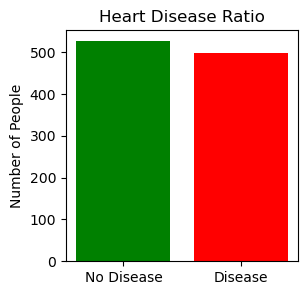

In [19]:
plt.figure(figsize = (3,3))
plt.bar(x = ["No Disease","Disease"],height = heart_df["target"].value_counts(),color = ["green","red"])
plt.title("Heart Disease Ratio")
plt.ylabel("Number of People")
plt.show()

**Divide the data into input and output data**

We divide data into two parts i.e input data and output data

input data = X; output data=y

Again we divide input data into two parts i.e train and test

input train data= x_train; input test data= x_test

similarly we divide output data into two parts i.e train and test

output train data= y_train; output test data= y_test

Model development happens on train data i.e x_train and y_train

Model will predict by passing x_test data, these are called y_predictions

y_predictions will compare with y_test , this is called test accuracy/ test error

------------------------------------------------------------

**Note :**

Before you divide data into Train and test

we need to seperate input and output data from origina data

Here Orginal data name: heart_df

Input data : X

drop output column
output data : y

select only output data

In [23]:
x = heart_df.drop("target",axis = 1)
y = heart_df["target"]

In [24]:
x.shape,y.shape

((1025, 13), (1025,))

In [25]:
y[:2]

0    0
1    0
Name: target, dtype: int64

In [26]:
heart_df.shape

(1025, 14)

**Divide the data into train and test data**

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 random_state=42,
                                                 test_size = 0.2)

*arrays: Input data and output data

test_size: how much you want to split as test data

0.2: 20% data
automatically 80% becomes train data

only give one variable either test_size or train_size

random_state: we need to divide the data randomly

1234 or 42

**Check the number of samples**
 - train data : 80%
 - test data : 20%

In [29]:
1025*80/100    # 820 train data observations
1025*20/100    #205 test data observations

205.0

**Observe the number of columns**

In [30]:
print(heart_df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1025, 14)
(820, 13)
(205, 13)
(820,)
(205,)


**Check the ID**

In [31]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [32]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3


In [33]:
y_train.head()

835    0
137    1
534    1
495    1
244    1
Name: target, dtype: int64

In [34]:
y_test.head()

527    1
359    1
447    0
31     1
621    0
Name: target, dtype: int64

**Develop the ML model**



Model name: Linear regression

package: sklearn

  - Read the package

  - save the package

  - apply fit

In [38]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

**Model Predictions**

In [39]:
y_predictions = LR.predict(x_test)

In [40]:
len(y_predictions)

205

In [41]:
len(y_test)

205

y_predictions will compare with y_test , this is called test accuracy/ test error

In [44]:
#compare values

y_test[:5].values,y_predictions[:5]

(array([1, 1, 0, 1, 0], dtype=int64),
 array([0.93226944, 1.25906964, 0.02618481, 0.94320254, 0.15782887]))

**Model Metrics : Evaluation**

In [45]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

 we need to pass actual output i.e y_test and predictions i.e y_preditions

In [49]:
print("The R2 score is : ",r2_score(y_test,y_predictions))

print("The Mean Square Error is : ",mean_squared_error(y_test,y_predictions))

print("The Mean Absolute Error is : ",mean_absolute_error(y_test,y_predictions))

print("The Root Mean Square Error is : ",np.sqrt(mean_squared_error(y_test,y_predictions)))

The R2 score is :  0.4096080106078549
The Mean Square Error is :  0.14759448520056812
The Mean Absolute Error is :  0.3096660894747364
The Root Mean Square Error is :  0.3841802769541509


In [48]:
print(mean_squared_error(y_test[:5],y_predictions[:5]))

0.020105210979065063


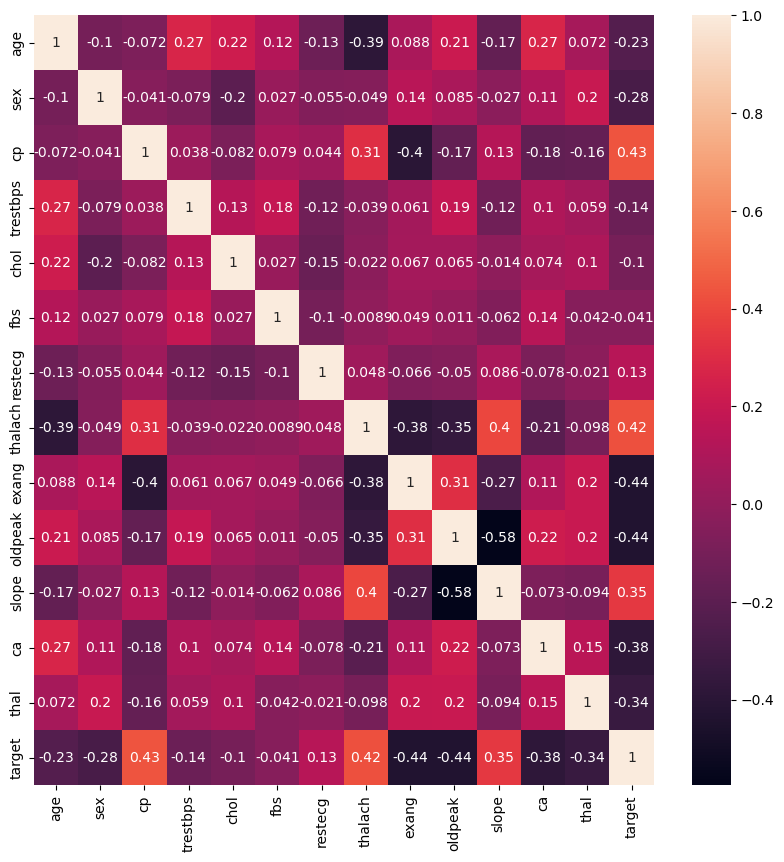

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_df.corr(),annot=True)
plt.show()

**Finding Coeffiecient and Intercept**

 Coefficient means b0 ,b1 ,b2....

  Coeffiecints depends on number of input features

  In this data we have only 13 columns as input 

  So we will get 13 coeffiecients

In [53]:
LR.coef_

array([-0.00045088, -0.19524892,  0.10786101, -0.00173443, -0.00072623,
       -0.00148877,  0.02489578,  0.00306413, -0.13079593, -0.07344897,
        0.07911946, -0.09922126, -0.14550772])

In [54]:
LR.intercept_

0.9355047328469686

- Regression_equation :
 - Regression_equation=LR.intercept_+LR.coef_*'columns'


**Save the Model**
 
  - Using the package called "pickle" we will save the model
  - pickle package is the combination of different packages

In [55]:
import pickle

pickle.dump(LR,open("Heart Disease Analysis.pkl","wb"))

**Load the Model**
 
  - Here we will load the pickle file

In [56]:
heart_model = pickle.load(open("Heart Disease Analysis.pkl","rb"))
heart_model

LinearRegression()

**Predictions Analysis**

  - We have dump the model
  - We have load the model
  - Now we perform the predictions by passing the test cases

In [57]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,62,0,0,124,209,0,1,163,0,0.0,2,0,2
359,53,0,2,128,216,0,0,115,0,0.0,2,0,0
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,68,1,2,118,277,0,1,151,0,1.0,2,1,3
796,41,1,1,135,203,0,1,132,0,0.0,1,0,1
644,44,1,2,120,226,0,1,169,0,0.0,2,0,2
404,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [60]:
x_test.values

array([[62.,  0.,  0., ...,  2.,  0.,  2.],
       [53.,  0.,  2., ...,  2.,  0.,  0.],
       [55.,  1.,  0., ...,  1.,  1.,  3.],
       ...,
       [44.,  1.,  2., ...,  2.,  0.,  2.],
       [61.,  1.,  0., ...,  2.,  1.,  3.],
       [58.,  1.,  2., ...,  1.,  1.,  3.]])

In [63]:
heart_model.predict(x)

array([ 0.33553759,  0.00455299, -0.01953803, ...,  0.17476725,
        0.89212921,  0.18293294])

- Provide the input columns manually , model will predict the output

In [66]:
heart_model.predict([[24,1,2,130,280,0,0,150,1,0.9,2,0,2]])

array([0.64627729])

In [67]:
import os
os.getcwd()

'C:\\Users\\sures\\OneDrive\\Documents\\Data Science\\Machine Learning'

In [68]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')